<a href="https://colab.research.google.com/github/KirthivasanPN-hash/Itinerary_fares_analysis_big_data/blob/main/avaiation__mgmt_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
filepath = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'
df = pd.read_excel(filepath)
print(df.head())



  2023 Passenger Rank Airport Code                              Airport Name  \
0                   1          LAX                 Los Angeles International   
1                   2          ORD              Chicago O'Hare International   
2                   3          DEN                      Denver International   
3                   4          ATL  Hartsfield-Jackson Atlanta International   
4                   5          EWR              Newark Liberty International   

        City Name State Name  Average Fare ($)  \
0     Los Angeles         CA        416.689079   
1  Chicago-O'Hare         IL        388.547245   
2          Denver         CO        357.584087   
3         Atlanta         GA        400.396089   
4          Newark         NJ        426.741235   

   Inflation Adjusted Average Fare ($) (Base Quarter:  Q4-2023)  \
0                                         416.689079              
1                                         388.547245              
2                

In [ ]:
print(df.columns)

Index(['2023 Passenger Rank', 'Airport Code', 'Airport Name', 'City Name',
       'State Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q4-2023)',
       '2023 Passengers (10% sample)'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx')

# Display the first few rows of the DataFrame
print(df.head())


  2023 Passenger Rank Airport Code                              Airport Name  \
0                   1          LAX                 Los Angeles International   
1                   2          ORD              Chicago O'Hare International   
2                   3          DEN                      Denver International   
3                   4          ATL  Hartsfield-Jackson Atlanta International   
4                   5          EWR              Newark Liberty International   

        City Name State Name  Average Fare ($)  \
0     Los Angeles         CA        416.689079   
1  Chicago-O'Hare         IL        388.547245   
2          Denver         CO        357.584087   
3         Atlanta         GA        400.396089   
4          Newark         NJ        426.741235   

   Inflation Adjusted Average Fare ($) (Base Quarter:  Q4-2023)  \
0                                         416.689079              
1                                         388.547245              
2                

In [ ]:
import pandas as pd
from google.colab import files

def xlsx_to_csv(input_file, output_file):
    # Read Excel file into a DataFrame
    df = pd.read_excel('/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx')

    # Write DataFrame to CSV file
    df.to_csv(output_file, index=False)

    # Download the CSV file
    files.download(output_file)

# Replace 'input.xlsx' with the path to your Excel file
input_file = 'input.xlsx'

# Replace 'output.csv' with the desired name for your CSV file
output_file = 'aviation_data.csv'

# Call the function to convert Excel to CSV and download the file
xlsx_to_csv(input_file, output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filter the DataFrame for the state 'CA'
df_ca = df[df['State Name'] == 'CA']

# Aggregate passenger numbers by City Name and Airport Code for the state 'CA'
total_passengers_city_ca = df_ca.groupby('City Name')['2023 Passengers (10% sample)'].sum().sort_values(ascending=False)
total_passengers_airport_ca = df_ca.groupby('Airport Code')['2023 Passengers (10% sample)'].sum().sort_values(ascending=False)

print("Total passengers by city in California:")
print(total_passengers_city_ca)
print("\nTotal passengers by airport in California:")
print(total_passengers_airport_ca)


Total passengers by city in California:
City Name
Los Angeles        1253716.0
San Francisco       811808.0
San Diego           566704.0
Sacramento          346768.0
San Jose            293529.0
Santa Ana           268194.0
Oakland             268118.0
Ontario             179868.0
Burbank             166485.0
Long Beach           91391.0
Fresno               62442.0
Palm Springs         52826.0
Santa Barbara        33422.0
Santa Rosa           17676.0
San Luis Obispo      17589.0
Monterey             12065.0
Bakersfield          10949.0
Arcata/Eureka         6883.0
Redding               5155.0
Stockton              4631.0
San Bernardino        1434.0
Santa Maria            828.0
Bishop                 338.0
El Centro              234.0
Name: 2023 Passengers (10% sample), dtype: float64

Total passengers by airport in California:
Airport Code
LAX    1253716.0
SFO     811808.0
SAN     566704.0
SMF     346768.0
SJC     293529.0
SNA     268194.0
OAK     268118.0
ONT     179868.0
BUR     16

In [ ]:
import matplotlib.pyplot as plt

# Convert total passengers to millions
total_passengers_city_ca_millions = total_passengers_city_ca / 1000000
total_passengers_airport_ca_millions = total_passengers_airport_ca / 1000000

# Plot histogram for total passengers by city in California
plt.figure(figsize=(10, 6))
plt.bar(total_passengers_city_ca.index, total_passengers_city_ca_millions, color='skyblue')
plt.title('Total Passengers by City in California')
plt.xlabel('City Name')
plt.ylabel('Total Passengers (in millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot histogram for total passengers by airport in California
plt.figure(figsize=(10, 6))
plt.bar(total_passengers_airport_ca.index, total_passengers_airport_ca_millions, color='lightgreen')
plt.title('Total Passengers by Airport in California')
plt.xlabel('Airport Code')
plt.ylabel('Total Travelling Passengers (in millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


filepath = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'
df = pd.read_excel(filepath, header=None)
    """Load an Excel file into a pandas DataFrame."""
    return pd.read_excel(filepath)

 #Transform Data
def transform_data(df):
    """Perform data transformations such as handling missing values or deriving new columns."""
    df.fillna(method='ffill', inplace=True)
    return df

#  Summarize Data
def summarize_data(df):
    """Generate basic summaries or statistics."""
    summary = df.describe()
    return summary


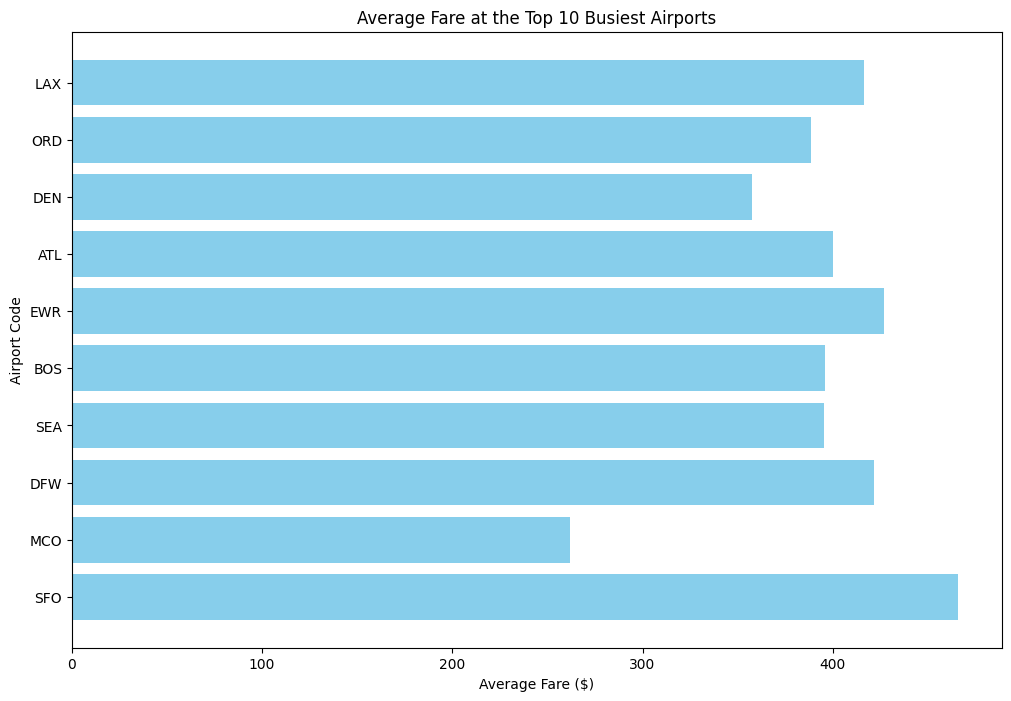

In [ ]:
top_10_airports = df.nlargest(10, '2023 Passengers (10% sample)')

# Plotting the average fares at these airports
plt.figure(figsize=(12, 8))
plt.barh(top_10_airports['Airport Code'], top_10_airports['Average Fare ($)'], color='skyblue')
plt.xlabel('Average Fare ($)')
plt.ylabel('Airport Code')
plt.title('Average Fare at the Top 10 Busiest Airports')
plt.gca().invert_yaxis()  # Invert y-axis to show the busiest at the top
plt.show()

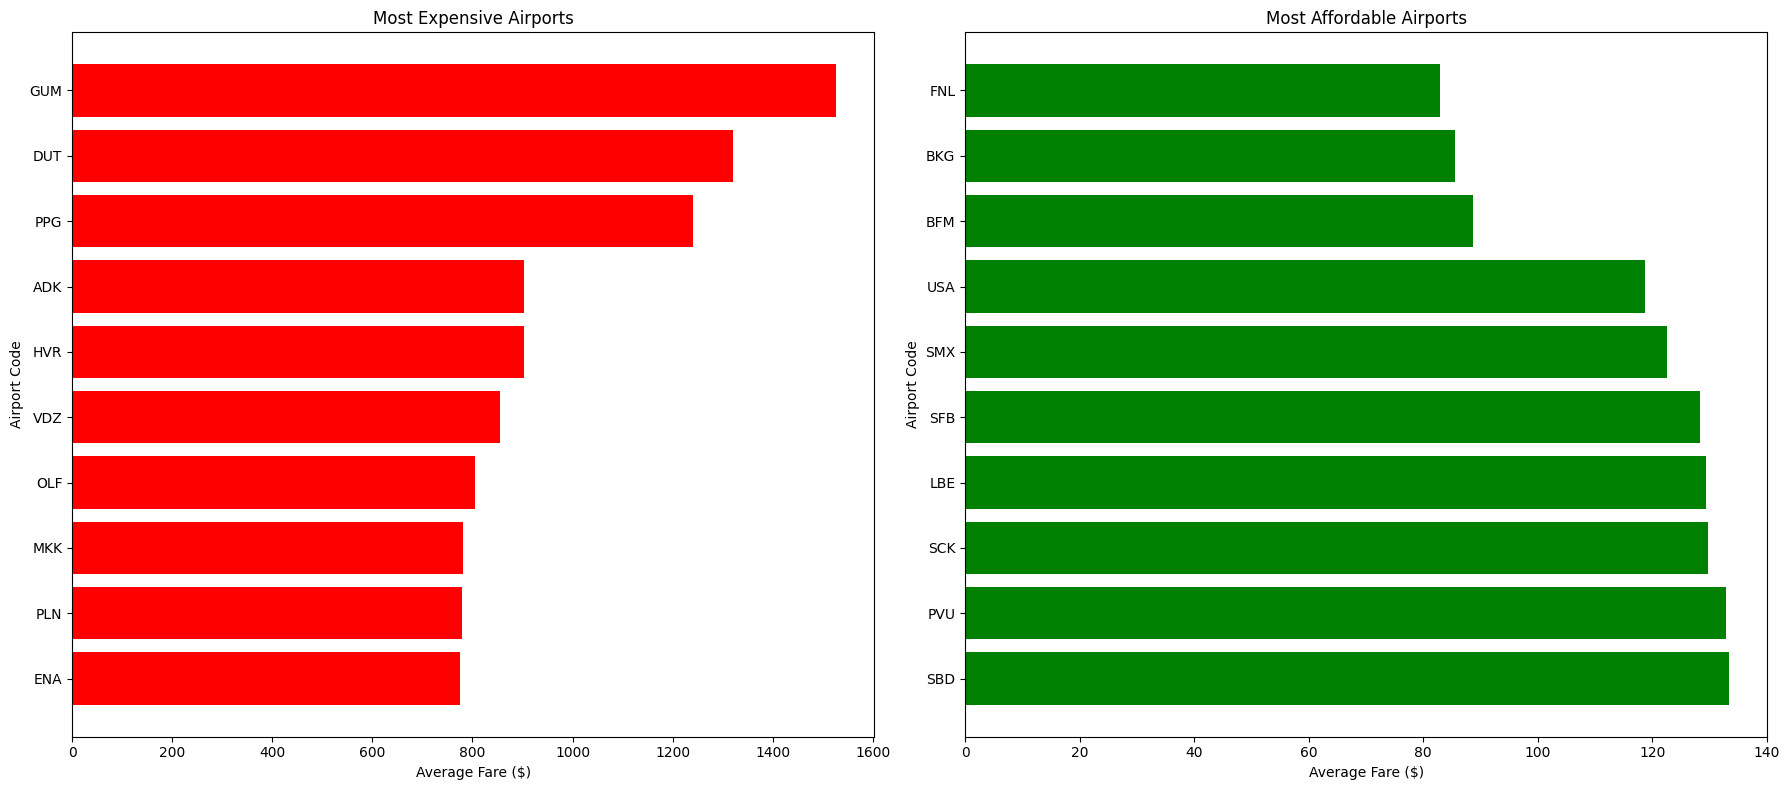

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the most expensive and most affordable airports based on average fare
most_expensive_airports = df.nlargest(10, 'Average Fare ($)')
most_affordable_airports = df.nsmallest(10, 'Average Fare ($)')

# Plotting both on separate subplots for comparison
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Most Expensive Airports
ax[0].barh(most_expensive_airports['Airport Code'], most_expensive_airports['Average Fare ($)'], color='red')
ax[0].set_title('Most Expensive Airports')
ax[0].set_xlabel('Average Fare ($)')
ax[0].set_ylabel('Airport Code')
ax[0].invert_yaxis()

# Most Affordable Airports
ax[1].barh(most_affordable_airports['Airport Code'], most_affordable_airports['Average Fare ($)'], color='green')
ax[1].set_title('Most Affordable Airports')
ax[1].set_xlabel('Average Fare ($)')
ax[1].set_ylabel('Airport Code')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# number of airports in a city
def visualize_data(df):

  # Load the dataset (make sure to use the correct file path)
  file_path = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'
  df = pd.read_excel(file_path)


  airports_per_city = df['City Name'].value_counts()

  #top N cities with the most airports f
  top_cities = airports_per_city.head(20)

  plt.figure(figsize=(10, 8))
  top_cities.plot(kind='barh')


  plt.title('Number of Airports in Top 20 Cities')
  plt.xlabel('Number of Airports')
  plt.ylabel('City Name')


  plt.gca().invert_yaxis()


  plt.tight_layout()
  plt.show()

def visualize_fares(df):


  df['Average Fare ($)'] = pd.to_numeric(df['Average Fare ($)'], errors='coerce')


  plt.figure(figsize=(10, 6))
  plt.hist(df['Average Fare ($)'].dropna(), bins=30, edgecolor='black')


  plt.title('Distribution of Average Fares')
  plt.xlabel('Average Fare ($)')
  plt.ylabel('Frequency')

  plt.show()


def grouped_bar_passengers(df, state_name='CA', top_n=5):

    state_df = df[df['State Name'] == state_name]

    city_airport_passengers = state_df.groupby(['City Name', 'Airport Code'])['2023 Passengers (10% sample)'].sum().reset_index()


    top_cities = city_airport_passengers.groupby('City Name')['2023 Passengers (10% sample)'].sum().nlargest(top_n).index

    top_city_airport_passengers = city_airport_passengers[city_airport_passengers['City Name'].isin(top_cities)]

    pivot_data = top_city_airport_passengers.pivot(index='City Name', columns='Airport Code', values='2023 Passengers (10% sample)')


    ax = pivot_data.plot(kind='bar', figsize=(10, 6), width=0.8)

    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.1f}M'.format(x/1e6)))


    ax.set_xlabel('City Name', fontsize=12)
    ax.set_ylabel('Passenger Numbers (in millions)', fontsize=12)
    ax.set_title('Top 5 Cities Passenger Numbers by Airport within State CA', fontsize=14)


    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=10)


    ax.text(x=0.5, y=1.1, s='Values on the y-axis are in millions', ha='center', va='bottom', transform=ax.transAxes, fontsize=10)


    plt.tight_layout()
    plt.show()


def bubble_passengers_cities(df, state_name='CA', top_n=5):

    state_df = df[df['State Name'] == state_name]

    top_cities = state_df.groupby('City Name')['2023 Passengers (10% sample)'].sum().nlargest(top_n).reset_index()


    top_cities_df = state_df[state_df['City Name'].isin(top_cities['City Name'])]

    top_cities_df['Passenger Size'] = top_cities_df['2023 Passengers (10% sample)'] / top_cities_df['2023 Passengers (10% sample)'].max() * 1000

    plt.figure(figsize=(12, 8))
    plt.scatter(top_cities_df['Average Fare ($)'], top_cities_df['City Name'], s=top_cities_df['Passenger Size'], alpha=0.5)

    plt.title('Bubble Chart of Passengers and Fares by City for Top 5 Cities in CA')
    plt.xlabel('Average Fare ($)')
    plt.ylabel('City Name')

    plt.show()


In [ ]:
# Main function --> pipeline
def run_pipeline(filepath):
    df = load_data(filepath)
    df = transform_data(df)
    summary = summarize_data(df)
    print(summary)
    visualize_data(df)
    visualize_fares(df)
    grouped_bar_passengers(df)
    bubble_passengers_cities(df)



file_path = '/content/drive/MyDrive/mgmt_workspace/dataset_aviation_mgmt.xlsx'



run_pipeline(file_path)

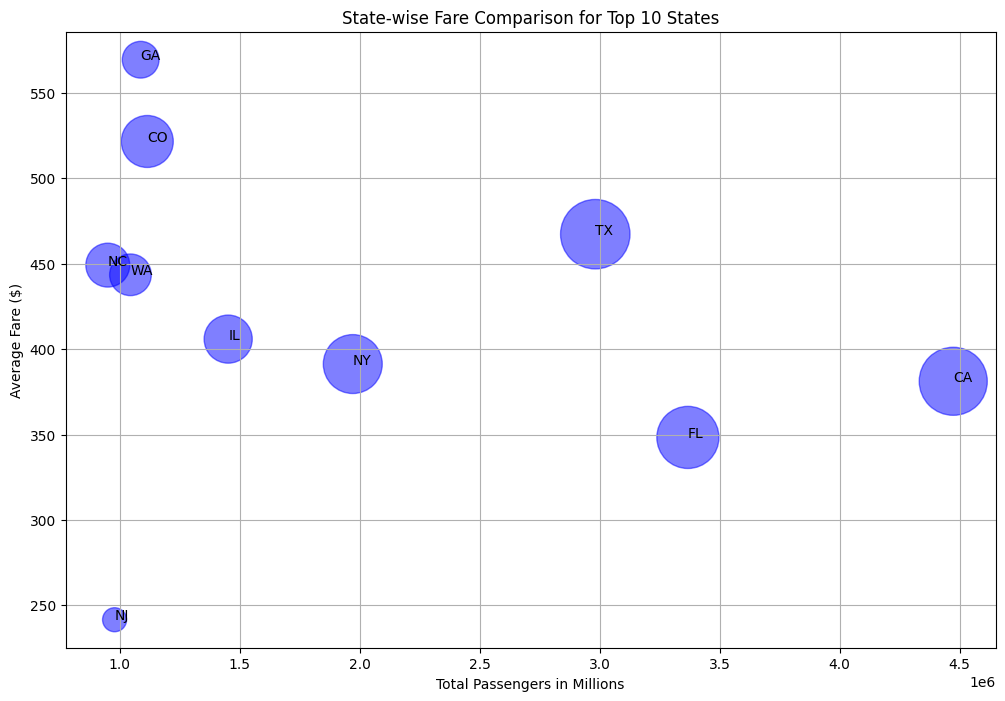

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate the data by state
state_data = df.groupby('State Name').agg(
    Average_Fare=('Average Fare ($)', 'mean'),
    Total_Passengers=('2023 Passengers (10% sample)', 'sum'),
    Airports=('Airport Code', 'nunique')
).reset_index()

# Sort states by Total Passengers and select the top 10
top_10_states = state_data.sort_values(by='Total_Passengers', ascending=False).head(10)

# Plotting the bubble chart for the top 10 states
plt.figure(figsize=(12, 8))
bubble_sizes = top_10_states['Airports'] * 100  # Scale factor for better visualization
plt.scatter(top_10_states['Total_Passengers'], top_10_states['Average_Fare'], s=bubble_sizes, alpha=0.5, color='blue')
plt.title('State-wise Fare Comparison for Top 10 States')
plt.xlabel('Total Passengers in Millions')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Adding labels for each state
for i, txt in enumerate(top_10_states['State Name']):
    plt.annotate(txt, (top_10_states['Total_Passengers'].iloc[i], top_10_states['Average_Fare'].iloc[i]))

plt.show()
